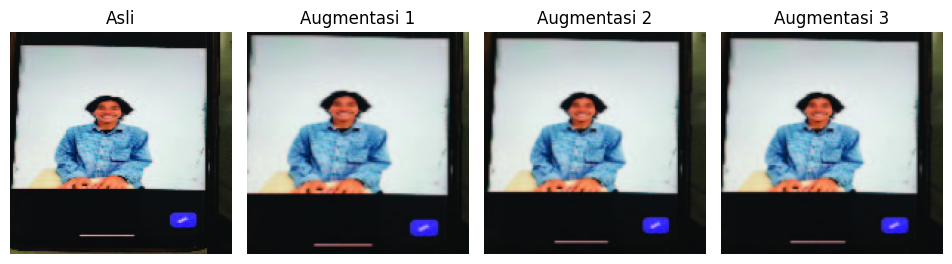

Found 3 images belonging to 2 classes.
Jumlah gambar dalam folder: 3
Epoch 1/9
1/1 [==============================] - 1s 1s/step - loss: 0.6300 - accuracy: 1.0000
Epoch 2/9
1/1 [==============================] - 0s 85ms/step - loss: 1.3155e-07 - accuracy: 1.0000
Epoch 3/9
1/1 [==============================] - 0s 86ms/step - loss: 2.3719e-12 - accuracy: 1.0000
Epoch 4/9
1/1 [==============================] - 0s 49ms/step - loss: 3.9934e-16 - accuracy: 1.0000
Epoch 5/9
1/1 [==============================] - 0s 41ms/step - loss: 2.7346e-19 - accuracy: 1.0000
Epoch 6/9
1/1 [==============================] - 0s 51ms/step - loss: 5.1146e-22 - accuracy: 1.0000
Epoch 7/9
1/1 [==============================] - 0s 44ms/step - loss: 2.0764e-24 - accuracy: 1.0000
Epoch 8/9
1/1 [==============================] - 0s 47ms/step - loss: 1.5770e-26 - accuracy: 1.0000
Epoch 9/9
1/1 [==============================] - 0s 141ms/step
Prediksi: Fake


In [1]:
import tensorflow as tf #mengotomatiskan dan melacak pelatihan model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt #library yang memiliki kemampuan untuk mendukung berbagai jenis gambar
import numpy as np #untuk perhitungan numerik
from tensorflow.keras.models import Sequential #untuk klasifikasi
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os #input data

# Fungsi untuk menampilkan gambar asli dan augmentasi
def tampilkan_gambar(gambar, judul=None):
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(gambar):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        if judul:
            plt.title(judul[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fungsi untuk menyimpan gambar yang telah di augmentasi
def simpan_gambar(gambar, folder_path, prefix='augmented'):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)  # Buat folder jika belum ada
    for i, img in enumerate(gambar):
        file_path = os.path.join(folder_path, f"{prefix}_{i + 1}.jpg")
        tf.keras.preprocessing.image.save_img(file_path, img)

# Augmentasi Gambar
datagen = ImageDataGenerator(
    zoom_range=0.1,  # Zoom out 10%
)

# Menggunakan path absolut dengan raw string
image_path = r'C:\Users\MSI BRAVO\Tugas\komvis.jpg'

# Periksa apakah file gambar ada
if not os.path.exists(image_path):
    print("File gambar tidak ada!")
else:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

# Menghasilkan gambar augmented
gambar_augmented = datagen.flow(img_array, batch_size=1)

# Menampilkan gambar asli dan augmented
gambar_asli = img_array[0].astype('uint8')
batch_gambar_augmented = [next(gambar_augmented)[0].astype('uint8') for _ in range(3)]

tampilkan_gambar([gambar_asli] + batch_gambar_augmented, judul=['Asli'] + [f'Augmentasi {i+1}' for i in range(3)])

# Menyimpan gambar augmented ke dalam folder 'Fake'
folder_simpan = r'C:\Users\MSI BRAVO\Tugas\Latih\Fake'  # Ganti dengan path ke folder 'Fake'
simpan_gambar(batch_gambar_augmented, folder_simpan)

# Mendefinisikan dimensi gambar input
tinggi = 150  # Tinggi gambar
lebar = 150   # Lebar gambar
saluran = 3   # Jumlah saluran warna (3 untuk RGB)

# Klasifikasi Gambar (Model Sederhana)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(tinggi, lebar, saluran)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Satu unit output untuk klasifikasi biner

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Memuat data pelatihan
direktori_latih = r'C:\Users\MSI BRAVO\Tugas\Latih'  # Path ke dataset Anda
datagen_latih = ImageDataGenerator(rescale=1./255)  # Normalisasi nilai piksel
generator_latih = datagen_latih.flow_from_directory(
    direktori_latih,
    target_size=(tinggi, lebar),
    batch_size=32,
    class_mode='binary'  # Gunakan mode kelas biner untuk klasifikasi biner
)

# Menghitung jumlah gambar dalam folder
jumlah_gambar = sum([len(files) for r, d, files in os.walk(r'C:\Users\MSI BRAVO\Tugas\Latih\Fake')])
print(f"Jumlah gambar dalam folder: {jumlah_gambar}")

if jumlah_gambar == 0:
    print("Tidak ada gambar untuk dilatih!")
else:
    # Melatih model
    model.fit(generator_latih, epochs=9)

    # Fungsi untuk mengklasifikasikan gambar baru
    def klasifikasikan_gambar(image_path):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(tinggi, lebar))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisasi
        prediksi = model.predict(img_array)
        return prediksi

    # Contoh penggunaan untuk mengklasifikasikan gambar baru
    path_gambar_baru = r'C:\Users\MSI BRAVO\Tugas\Latih\Fake\augmented_3.jpg'  # Ganti dengan path gambar baru yang ingin diklasifikasikan
    prediksi = klasifikasikan_gambar(path_gambar_baru)

    # Tampilkan hasil prediksi
    if prediksi[0][0] > 0.5:
        print("Prediksi: Real")
    else:
        print("Prediksi: Fake")

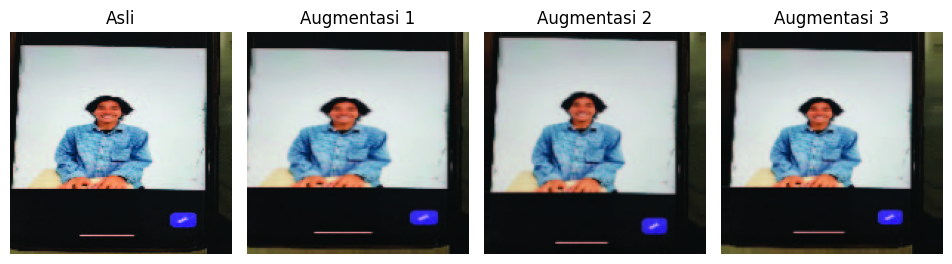

Found 170 images belonging to 2 classes.
Jumlah gambar dalam folder: 77
Epoch 1/9
6/6 [==============================] - 2s 200ms/step - loss: 5.5853 - accuracy: 0.4647
Epoch 2/9
6/6 [==============================] - 1s 126ms/step - loss: 2.8968 - accuracy: 0.5294
Epoch 3/9
6/6 [==============================] - 1s 131ms/step - loss: 1.3269 - accuracy: 0.5176
Epoch 4/9
6/6 [==============================] - 1s 126ms/step - loss: 0.8767 - accuracy: 0.6059
Epoch 5/9
6/6 [==============================] - 1s 131ms/step - loss: 0.7346 - accuracy: 0.5882
Epoch 6/9
6/6 [==============================] - 1s 125ms/step - loss: 0.5315 - accuracy: 0.7529
Epoch 7/9
6/6 [==============================] - 1s 120ms/step - loss: 0.5434 - accuracy: 0.6882
Epoch 8/9
6/6 [==============================] - 1s 126ms/step - loss: 0.4908 - accuracy: 0.7647
Epoch 9/9
6/6 [==============================] - 0s 45ms/step
Akurasi: 0.4706
Presisi: 0.5181
Recall: 0.4624
F1 Score: 0.4886
1/1 [=====================

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk menampilkan gambar asli dan augmentasi
def tampilkan_gambar(gambar, judul=None):
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(gambar):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        if judul:
            plt.title(judul[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fungsi untuk menyimpan gambar yang telah di augmentasi
def simpan_gambar(gambar, folder_path, prefix='augmented'):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, img in enumerate(gambar):
        file_path = os.path.join(folder_path, f"{prefix}_{i + 1}.jpg")
        tf.keras.preprocessing.image.save_img(file_path, img)

# Augmentasi Gambar
datagen = ImageDataGenerator(
    zoom_range=0.1,
    brightness_range=[0.9, 1.0]
)

# Menggunakan path absolut dengan raw string
image_path = r'C:\Users\MSI BRAVO\Tugas\komvis.jpg'

# Periksa apakah file gambar ada
if not os.path.exists(image_path):
    print("File gambar tidak ada!")
else:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

# Menghasilkan gambar augmented
gambar_augmented = datagen.flow(img_array, batch_size=1)

# Menampilkan gambar asli dan augmented
gambar_asli = img_array[0].astype('uint8')
batch_gambar_augmented = [next(gambar_augmented)[0].astype('uint8') for _ in range(3)]

tampilkan_gambar([gambar_asli] + batch_gambar_augmented, judul=['Asli'] + [f'Augmentasi {i+1}' for i in range(3)])

# Menyimpan gambar augmented ke dalam folder 'Fake'
folder_simpan = r'C:\Users\MSI BRAVO\Tugas\Latih\Fake'
simpan_gambar(batch_gambar_augmented, folder_simpan)

# Mendefinisikan dimensi gambar input
tinggi = 150
lebar = 150
saluran = 3

# Klasifikasi Gambar (Model Sederhana)
model = Sequential()
model.add(Input(shape=(tinggi, lebar, saluran)))  # Menambahkan Input layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Memuat data pelatihan
direktori_latih = r'C:\Users\MSI BRAVO\Tugas\Latih'
datagen_latih = ImageDataGenerator(rescale=1./255)
generator_latih = datagen_latih.flow_from_directory(
    direktori_latih,
    target_size=(tinggi, lebar),
    batch_size=32,
    class_mode='binary'
)

# Menghitung jumlah gambar dalam folder
jumlah_gambar = sum([len(files) for r, d, files in os.walk(r'C:\Users\MSI BRAVO\Tugas\Latih\Fake')])
print(f"Jumlah gambar dalam folder: {jumlah_gambar}")

if jumlah_gambar == 0:
    print("Tidak ada gambar untuk dilatih!")
else:
    # Melatih model
    model.fit(generator_latih, epochs=9)

        # Menghitung prediksi pada data pelatihan
    generator_latih.reset()  # Reset generator untuk memastikan kita mulai dari awal
    prediksi = model.predict(generator_latih)
    prediksi_kelas = (prediksi > 0.5).astype(int)  # Mengubah prediksi ke kelas biner

    # Mendapatkan label sebenarnya
    y_true = generator_latih.classes  # Kelas sebenarnya
    y_pred = prediksi_kelas.flatten()  # Rata-rata prediksi

    # Menghitung metrik evaluasi
    akurasi = accuracy_score(y_true, y_pred)
    presisi = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Menampilkan hasil metrik
    print(f"Akurasi: {akurasi:.4f}")
    print(f"Presisi: {presisi:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Fungsi untuk mengklasifikasikan gambar baru
    def klasifikasikan_gambar(image_path):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(tinggi, lebar))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisasi
        prediksi = model.predict(img_array)
        return prediksi

    # Contoh penggunaan untuk mengklasifikasikan gambar baru
    path_gambar_baru = r'C:\Users\MSI BRAVO\Tugas\Latih\Fake\augmented_3.jpg'  # Ganti dengan path gambar baru yang ingin diklasifikasikan
    prediksi = klasifikasikan_gambar(path_gambar_baru)

    # Tampilkan hasil prediksi
    if prediksi[0][0] > 0.5:
        print("Prediksi: Real")
    else:
        print("Prediksi: Fake")

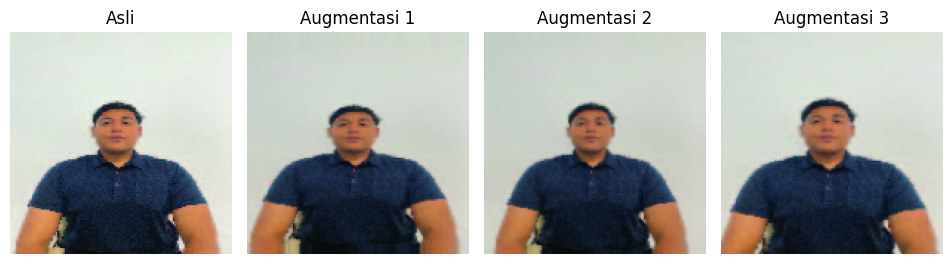

Found 170 images belonging to 2 classes.
Jumlah gambar dalam folder: 93
Epoch 1/5
6/6 [==============================] - 2s 187ms/step - loss: 2.4219 - accuracy: 0.4294
Epoch 2/5
6/6 [==============================] - 1s 119ms/step - loss: 1.1978 - accuracy: 0.5294
Epoch 3/5
6/6 [==============================] - 1s 134ms/step - loss: 0.7532 - accuracy: 0.5765
Epoch 4/5
6/6 [==============================] - 1s 139ms/step - loss: 0.5695 - accuracy: 0.6706
Epoch 5/5
6/6 [==============================] - 0s 49ms/step
Akurasi: 0.5412
Presisi: 0.5714
Recall: 0.6452
F1 Score: 0.6061
1/1 [==============================] - 0s 60ms/step
Prediksi: Real


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import Tk, Label, Button, filedialog, messagebox
from tkinter import font as tkFont

# Fungsi untuk menampilkan gambar asli dan augmentasi
def tampilkan_gambar(gambar, judul=None):
    plt.figure(figsize=(12, 6))
    for i, img in enumerate(gambar):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        if judul:
            plt.title(judul[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fungsi untuk menyimpan gambar yang telah di augmentasi
def simpan_gambar(gambar, folder_path, prefix='augmented'):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, img in enumerate(gambar):
        file_path = os.path.join(folder_path, f"{prefix}_{i + 1}.jpg")
        tf.keras.preprocessing.image.save_img(file_path, img)

# Augmentasi Gambar
datagen = ImageDataGenerator(
    zoom_range=0.1,
    brightness_range=[0.9, 1.0]
)

# Menggunakan path absolut dengan raw string
image_path = r'C:\Users\MSI BRAVO\Tugas\real-1.jpg'

# Periksa apakah file gambar ada
if not os.path.exists(image_path):
    print("File gambar tidak ada!")
else:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

# Menghasilkan gambar augmented
gambar_augmented = datagen.flow(img_array, batch_size=1)

# Menampilkan gambar asli dan augmented
gambar_asli = img_array[0].astype('uint8')
batch_gambar_augmented = [next(gambar_augmented)[0].astype('uint8') for _ in range(3)]

tampilkan_gambar([gambar_asli] + batch_gambar_augmented, judul=['Asli'] + [f'Augmentasi {i+1}' for i in range(3)])

# Menyimpan gambar augmented ke dalam folder 'Fake'
folder_simpan = r'C:\Users\MSI BRAVO\Tugas\Latih\Real'
simpan_gambar(batch_gambar_augmented, folder_simpan)

# Mendefinisikan dimensi gambar input
tinggi = 150
lebar = 150
saluran = 3

# Klasifikasi Gambar (Model Sederhana)
model = Sequential()
model.add(Input(shape=(tinggi, lebar, saluran)))  # Menambahkan Input layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Memuat data pelatihan
direktori_latih = r'C:\Users\MSI BRAVO\Tugas\Latih'
datagen_latih = ImageDataGenerator(rescale=1./255)
generator_latih = datagen_latih.flow_from_directory(
    direktori_latih,
    target_size=(tinggi, lebar),
    batch_size=32,
    class_mode='binary'
)

# Menghitung jumlah gambar dalam folder
jumlah_gambar = sum([len(files) for r, d, files in os.walk(r'C:\Users\MSI BRAVO\Tugas\Latih\Real')])
print(f"Jumlah gambar dalam folder: {jumlah_gambar}")

if jumlah_gambar == 0:
    print("Tidak ada gambar untuk dilatih!")
else:
    # Melatih model
    model.fit(generator_latih, epochs=5)

        # Menghitung prediksi pada data pelatihan
    generator_latih.reset()  # Reset generator untuk memastikan kita mulai dari awal
    prediksi = model.predict(generator_latih)
    prediksi_kelas = (prediksi > 0.5).astype(int)  # Mengubah prediksi ke kelas biner

    # Mendapatkan label sebenarnya
    y_true = generator_latih.classes  # Kelas sebenarnya
    y_pred = prediksi_kelas.flatten()  # Rata-rata prediksi

    # Menghitung metrik evaluasi
    akurasi = accuracy_score(y_true, y_pred)
    presisi = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Menampilkan hasil metrik
    print(f"Akurasi: {akurasi:.4f}")
    print(f"Presisi: {presisi:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Fungsi untuk mengklasifikasikan gambar baru
    def klasifikasikan_gambar(image_path):
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(tinggi, lebar))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalisasi
        prediksi = model.predict(img_array)
        return prediksi

    # Contoh penggunaan untuk mengklasifikasikan gambar baru
    path_gambar_baru = r'C:\Users\MSI BRAVO\Tugas\Latih\Real\augmented_3.jpg'  # Ganti dengan path gambar baru yang ingin diklasifikasikan
    prediksi = klasifikasikan_gambar(path_gambar_baru)

    # Tampilkan hasil prediksi
    if prediksi[0][0] > 0.5:
        print("Prediksi: Real")
    else:
        print("Prediksi: Fake")
        
def klasifikasi_gambar(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(tinggi, lebar))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediksi = model.predict(img_array)
    return prediksi

def pilih_gambar():
    global image_path
    image_path = filedialog.askopenfilename(filetypes=[('Image Files', '*.jpg *.jpeg *.png')])
    if image_path:
        prediksi = klasifikasi_gambar(image_path)
        hasil_label.config(text=f'Prediksi: {("Real" if prediksi[0][0] > 0.5 else "Fake")}', font=('Helvetica', 16, 'bold'))

# Tampilan GUI
window = Tk()
window.title('Klasifikasi Wajah Asli dan Palsu')
window.geometry('600x400')  # Increased window size
window.config(bg='lightblue')  # Background color

# Custom font
custom_font = tkFont.Font(family="Helvetica", size=12, weight="bold")

# Label for results
hasil_label = Label(window, text='', bg='lightblue', font=('Helvetica', 16))
hasil_label.pack(pady=20)

# Button to choose image
pilih_button = Button(window, text='Pilih Gambar', command=pilih_gambar, font=custom_font, bg='white', fg='blue', padx=10, pady=5)
pilih_button.pack(pady=10)

# Add a title label
title_label = Label(window, text='Deteksi Wajah Asli dan Palsu', bg='lightblue', font=('Helvetica', 20, 'bold'))
title_label.pack(pady=20)

window.mainloop()